# Spectrogram Reading Lecture 7: Decoding a Spectrogram



In [4]:
import soundfile as sf
import io
import urllib.request as request
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download a mystery file
# and chop out an interesting segment
data, fs = sf.read(io.BytesIO(request.urlopen('http://courses.engr.illinois.edu/ece590sip/sp2018/mystery2018feb27.wav').read()))
time1_1 = 0
time1_2 = time1_1+1.5
time2_1 = time1_2-0.2
time2_2 = time2_1+1.5
wav1 = data[int(time1_1*fs):int(time1_2*fs)]
N = len(wav1)
wav2 = np.zeros(N)
wav2[0:min(N,len(data)-int(time2_2*fs))] = data[int(time2_1*fs):min(len(data),int(time2_2*fs))]
# Create a t axis, then plot the waveform as a function of n, and as a function of t
times1 = np.linspace(time1_1,time1_2,N)
times2 = np.linspace(time2_1,time2_2,N) 


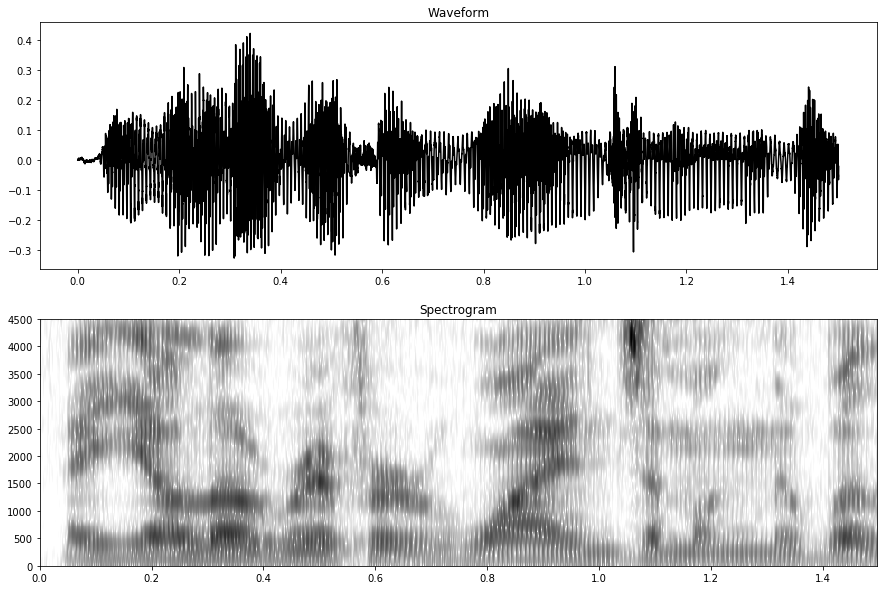

In [7]:
import spectrogram as sg
skip = int(0.002*fs)
windowlen = int(0.006*fs)
(S1,Ext1)=sg.sgram(wav1,skip,windowlen,1024,fs,4500,alpha=0.98,start_time=time1_1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(times1,wav1,'k')
plt.title('Waveform')
plt.subplot(212)
im1=plt.imshow(S1,origin='lower',extent=Ext1,aspect='auto')
im1.set_cmap('Greys')
plt.title('Spectrogram')


(1.3, 2.7960000000000003, 0, 4500)

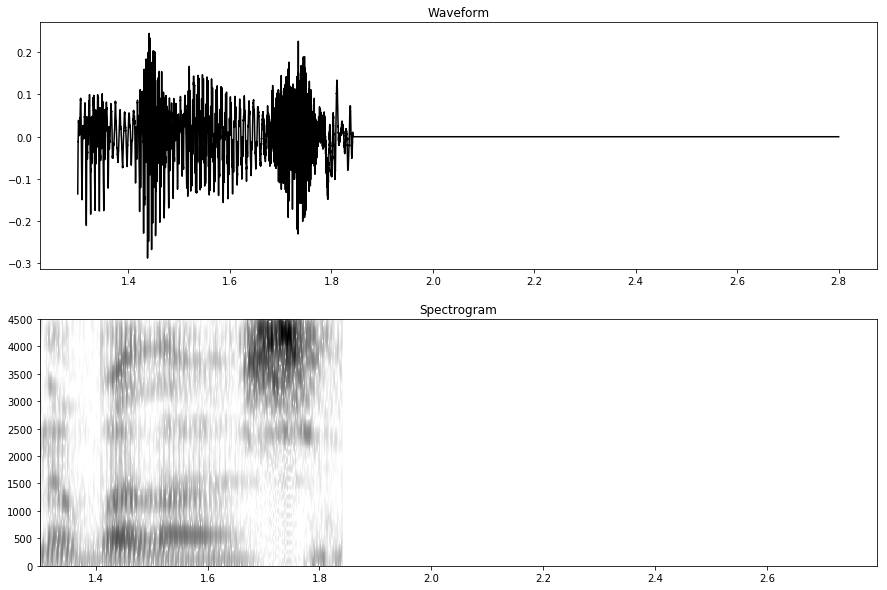

In [8]:
(S2,Ext2)=sg.sgram(wav2,skip,windowlen,1024,fs,4500,alpha=0.98,start_time=time2_1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(times2,wav2,'k')
plt.title('Waveform')
plt.subplot(212)
im2=plt.imshow(S2,origin='lower',extent=Ext2,aspect='auto')
im2.set_cmap('Greys')
plt.title('Spectrogram')
Ext2